In [37]:
import pandas as pd
from geopy.geocoders import Nominatim
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [78]:

#Import Tickets Database
location = pd.read_csv("C:/Users/KevinRomero/OneDrive - CIPPlanner Corporation/Desktop/text analisis Tickets/Customers_Address.csv", encoding='latin-1',header=0)

# Replace spaces with underscores in column names
location.columns = location.columns.str.replace(' ', '_')

location

,Customer_Code,Customer_Name,City,Zip_Code,Physical_Address
0,MARS,MARS Information Services,Mount Olive,7828,"800 High Street\nHackettstown, NJ 07840"
1,FDXG,FedEx Ground Package System Inc,Moon Township,15108,FedEx Ground Package System Inc.\nBob Drozynsk...
2,SFO-CPS,SFO-CPS (Budget Office),San Francisco,94128,San Francisco International Airport \nP.O. Box...
3,VAL,Valspar Corporation,Minneapolis,55415,Beth R. Archacki - IT Manager\nSherwin William...
4,VWTS,Veolia Water Technologies & Solutions,Trevose,19053,Veolia Water Technology1\n4636 Somerton Rd. \n...
5,TTD,Tahoe Transportation District,Stateline,89448,Tahoe Transportation District\n128 Market Stre...
6,SAWS,San Antonio Water System TX,San Antonio,78299,Mr. Robert J. Pina - IT Director\nSan Antonio ...
7,MESA,City of Mesa Arizona,Mesa,85211,Engineering Department\nCity of Mesa\nP.O. Box...
8,CIPPlanner,CIPPlanner Corp Delete,San Ramon,94582,NaN
9,LAWA,Los Angeles World Airports,Los Angeles,90045,Los Angeles World Airports


In [79]:
#Import Tickets Database
tickets = pd.read_csv("C:/Users/KevinRomero/OneDrive - CIPPlanner Corporation/Desktop/text analisis Tickets/Support Ticket Customer Unresponsive Days_2012_10.31.23_PBIexport.csv", encoding='latin-1',header=0)

# Replace spaces with underscores in column names
tickets.columns = tickets.columns.str.replace(' ', '_')

tickets = tickets.rename(columns={'Customer': 'Customer_Code'})

#tickets = tickets.drop(columns=['noun_chunks'])

tickets

,IssueID,Title,Created_By,Created_On,Issue_Ownership,Support_Status,Customer_Code,claned_title,sentiment_scores,compound_score,...,noun_chunks,multi_word_noun_chunks,named_entities,Noun_Chunks_Text,CIP_Respond_By_Date,Client_Module,CIPPlanner(Days),Client(Days),Estimated_Duration,Actual_Duration
0,CI_005763,Add Contingency Line Item,Awasthi Gaurav,10/31/2023 12:10,None,Closed,FFX,add contingency line item,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,...,['contingency line item'],['contingency line item'],[],contingency line item,"Sunday, November 5, 2023",NaN,0.45,0.30,4,0.75
1,CI_005762,Update PCO Status to Approved,Awasthi Gaurav,10/31/2023 12:08,None,Closed,FFX,update pco status to approved,"{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...",0.4215,...,['pco status'],['pco status'],[],pco status,"Sunday, November 5, 2023",NaN,0.45,0.30,4,0.75
2,CI_005761,CP04640015 - Water System Aging Main Rehab and...,Monalisa DelRio,10/31/2023 9:20,None,Closed,MESA,cp04640015 water system aging main rehab and ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,...,"['water system', 'main rehab', '2014 water bon...","['water system', 'main rehab', '2014 water bon...","[('2014', 'CARDINAL'), ('80st wl', 'LAW')]","water system, main rehab, 2014 water bond pom ...","Friday, November 3, 2023",NaN,0.70,0.25,2,0.95
3,CI_005760,(Urgent) Unable to Export Contract Line Items,Tripp Kennedy,10/31/2023 7:32,None,Closed,WILM,urgent unable to export contract line items,"{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp...",0.2023,...,['contract line item'],['contract line item'],[],contract line item,"Friday, November 3, 2023",NaN,1.13,0.06,2,1.19
4,CI_005759,Update Amendment Status,Awasthi Gaurav,10/31/2023 5:49,None,Closed,FFX,update amendment status,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,...,['amendment status'],['amendment status'],[],amendment status,"Sunday, November 5, 2023",NaN,0.71,0.30,4,1.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5234,CI_000537,Fail to Delete Batch,Sweet He,2/8/2012 17:51,CIPPlanner,Closed,SFO-CPS,fail to delete batch,"{'neg': 0.538, 'neu': 0.462, 'pos': 0.0, 'comp...",-0.5423,...,['batch'],[],[],batch,"Saturday, March 31, 2012",NaN,4303.63,0.00,51,4303.63
5235,CI_000536,Fail to update Fund Revenue Template when sub-...,Scarlett Zhong,2/7/2012 23:08,CIPPlanner,Closed,TTD,fail to update fund revenue template when subn...,"{'neg': 0.28, 'neu': 0.72, 'pos': 0.0, 'compou...",-0.5423,...,"['fund revenue template', 'subnode']",['fund revenue template'],[],"fund revenue template, subnode","Tuesday, February 28, 2012",NaN,0.43,0.00,20,0.43
5236,CI_000535,Arithmetic overflow error converting money to ...,Sweet He,2/2/2012 0:24,CIPPlanner,Closed,SFO-CPS,arithmetic overflow error converting money to ...,"{'neg': 0.252, 'neu': 0.748, 'pos': 0.0, 'comp...",-0.4019,...,"['arithmetic overflow error', 'money', 'data t...","['arithmetic overflow error', 'data type numer...",[],"arithmetic overflow error, money, data type nu...","Saturday, March 31, 2012",NaN,4310.35,0.00,57,4310.35
5237,CI_000533,"Scenario list on ""copy projects"" screen is not...",Buddy Liang,1/6/2012 0:39,CIPPlanner,Closed,HND,scenario list on copy projects screen is not c...,"{'neg': 0.156, 'neu': 0.844, 'pos': 0.0, 'comp...",-0.2584,...,"['scenario list', 'copy project screen', 'secu...","['scenario list', 'copy project screen', 'secu...",[],"scenario list, copy project screen, security m...","Friday, January 6, 2012",NaN,0.00,0.00,0,0.00


In [80]:
# Use merge to combine the dataframes based on the 'City' column
merged_df = location.merge(tickets, on='Customer_Code', how='left')

# Use groupby and count to get the number of occurrences of each city
city_counts = merged_df.groupby('Customer_Code').size().reset_index(name='TicketCount')

# Merge the city_counts dataframe back into the original dataframe
location = location.merge(city_counts, on='Customer_Code', how='left')
location

# If there are cities that didn't appear in df2, fill NaN values with 0
#df1['CityCount'] = df1['CityCount'].fillna(0).astype(int)

#print(df1)

,Customer_Code,Customer_Name,City,Zip_Code,Physical_Address,TicketCount
0,MARS,MARS Information Services,Mount Olive,7828,"800 High Street\nHackettstown, NJ 07840",504
1,FDXG,FedEx Ground Package System Inc,Moon Township,15108,FedEx Ground Package System Inc.\nBob Drozynsk...,415
2,SFO-CPS,SFO-CPS (Budget Office),San Francisco,94128,San Francisco International Airport \nP.O. Box...,179
3,VAL,Valspar Corporation,Minneapolis,55415,Beth R. Archacki - IT Manager\nSherwin William...,125
4,VWTS,Veolia Water Technologies & Solutions,Trevose,19053,Veolia Water Technology1\n4636 Somerton Rd. \n...,41
5,TTD,Tahoe Transportation District,Stateline,89448,Tahoe Transportation District\n128 Market Stre...,16
6,SAWS,San Antonio Water System TX,San Antonio,78299,Mr. Robert J. Pina - IT Director\nSan Antonio ...,398
7,MESA,City of Mesa Arizona,Mesa,85211,Engineering Department\nCity of Mesa\nP.O. Box...,1446
8,CIPPlanner,CIPPlanner Corp Delete,San Ramon,94582,NaN,3
9,LAWA,Los Angeles World Airports,Los Angeles,90045,Los Angeles World Airports,73


In [82]:
# Function to geocode city names or zip codes
def geocode_location(location):
    geolocator = Nominatim(user_agent="my_geocoder")
    location_info = geolocator.geocode(location)
    if location_info:
        return location_info.latitude, location_info.longitude
    else:
        return None, None

# Apply the geocoding function to the DataFrame
location['Latitude'], location['Longitude'] = zip(*location['City'].apply(geocode_location))

# Create a GeoDataFrame from the DataFrame
geometry = [Point(lon, lat) for lon, lat in zip(location['Longitude'], location['Latitude'])]
gdf = gpd.GeoDataFrame(location, geometry=geometry)

# Optional: Set the coordinate reference system (CRS)
gdf.crs = 'EPSG:4326'  # WGS84 coordinate system

# Display the GeoDataFrame
gdf

,Customer_Code,Customer_Name,City,Zip_Code,Physical_Address,TicketCount,Latitude,Longitude,geometry
0,MARS,MARS Information Services,Mount Olive,7828,"800 High Street\nHackettstown, NJ 07840",504,33.681159,-86.880224,POINT (-86.88022 33.68116)
1,FDXG,FedEx Ground Package System Inc,Moon Township,15108,FedEx Ground Package System Inc.\nBob Drozynsk...,415,40.506100,-80.208200,POINT (-80.20820 40.50610)
2,SFO-CPS,SFO-CPS (Budget Office),San Francisco,94128,San Francisco International Airport \nP.O. Box...,179,37.779026,-122.419906,POINT (-122.41991 37.77903)
3,VAL,Valspar Corporation,Minneapolis,55415,Beth R. Archacki - IT Manager\nSherwin William...,125,44.977300,-93.265469,POINT (-93.26547 44.97730)
4,VWTS,Veolia Water Technologies & Solutions,Trevose,19053,Veolia Water Technology1\n4636 Somerton Rd. \n...,41,40.139277,-74.981002,POINT (-74.98100 40.13928)
5,TTD,Tahoe Transportation District,Stateline,89448,Tahoe Transportation District\n128 Market Stre...,16,38.966774,-119.944275,POINT (-119.94427 38.96677)
6,SAWS,San Antonio Water System TX,San Antonio,78299,Mr. Robert J. Pina - IT Director\nSan Antonio ...,398,29.424600,-98.495141,POINT (-98.49514 29.42460)
7,MESA,City of Mesa Arizona,Mesa,85211,Engineering Department\nCity of Mesa\nP.O. Box...,1446,33.415101,-111.831455,POINT (-111.83146 33.41510)
8,CIPPlanner,CIPPlanner Corp Delete,San Ramon,94582,NaN,3,37.764802,-121.954439,POINT (-121.95444 37.76480)
9,LAWA,Los Angeles World Airports,Los Angeles,90045,Los Angeles World Airports,73,34.053691,-118.242766,POINT (-118.24277 34.05369)


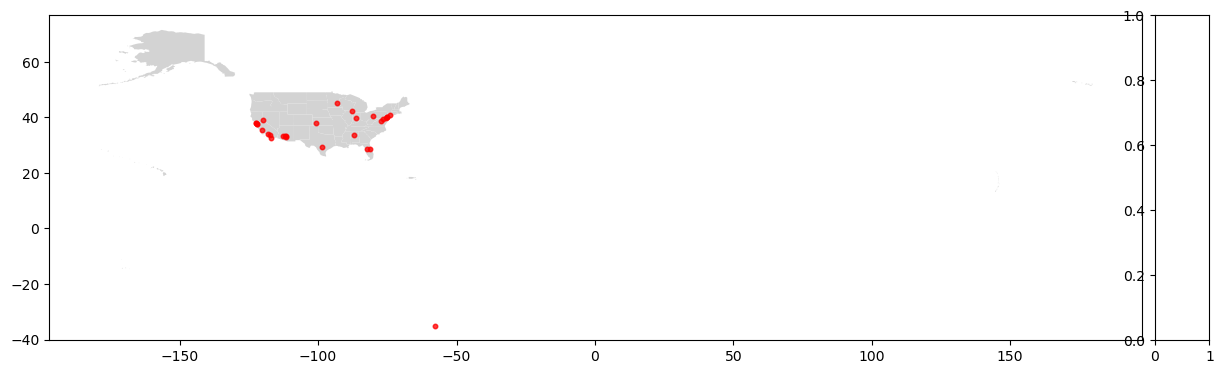

In [83]:
# Load USA shapefile
usa = gpd.read_file("C:/Users/KevinRomero/OneDrive - CIPPlanner Corporation/Desktop/text analisis Tickets/tl_rd22_us_state/tl_rd22_us_state.shp")

# Plot the USA map
fig, ax = plt.subplots(figsize=(15, 15))
usa.plot(ax=ax, color='lightgray')

# Plot city locations on top
gdf.plot(ax=ax, color='red', markersize=10, alpha=0.5)

# Add legend
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
gdf.plot(ax=ax, color='red', markersize=10, alpha=0.5, legend=True, cax=cax)

# Show the plot
plt.show()

KeyError: 'projection'

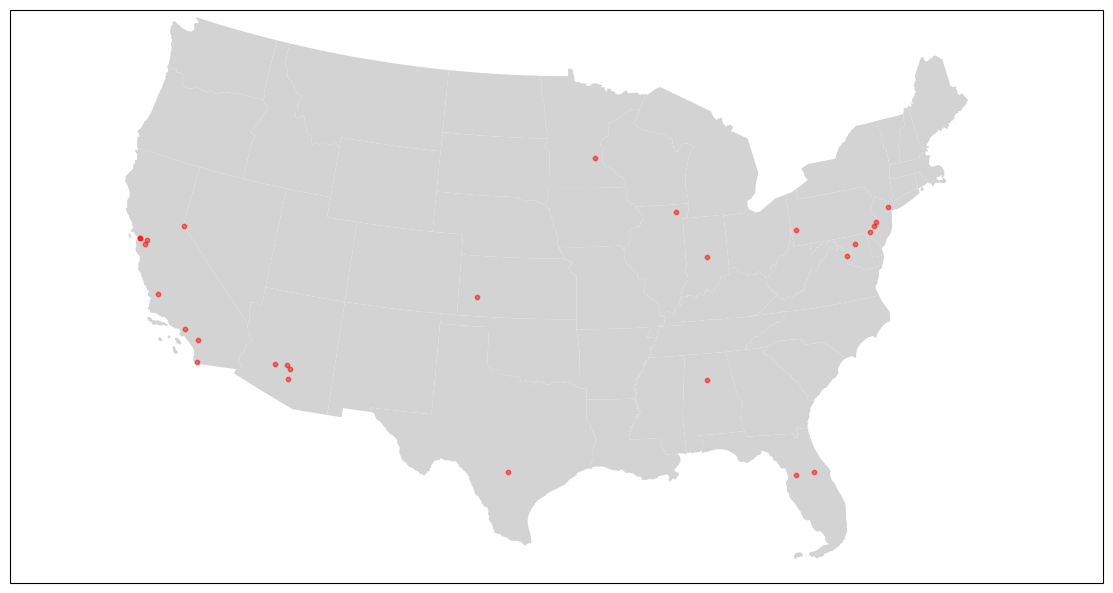

In [84]:
import cartopy.crs as ccrs
# Create a Cartopy projection centered on the USA
proj = ccrs.LambertConformal(central_longitude=-95, central_latitude=37.5)

# Create a GeoDataFrame with the USA shapefile, reprojecting it to the chosen projection
usa = usa.to_crs(proj.proj4_init)

# Increase the figure size
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw={'projection': proj})  # Adjust the size as needed

# Set plot limits
ax.set_extent([-125, -66.5, 24, 49], crs=ccrs.PlateCarree())  # Adjust the limits as needed

# Plot the USA map
usa.plot(ax=ax, color='lightgray')

# Plot city locations on top
gdf.plot(ax=ax, color='red', markersize=10, alpha=0.5, transform=ccrs.PlateCarree())

# Add legend
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
gdf.plot(ax=ax, color='red', markersize=10, alpha=0.5, legend=True, cax=cax, transform=ccrs.PlateCarree())

# Show the plot
plt.show()

KeyError: 'projection'

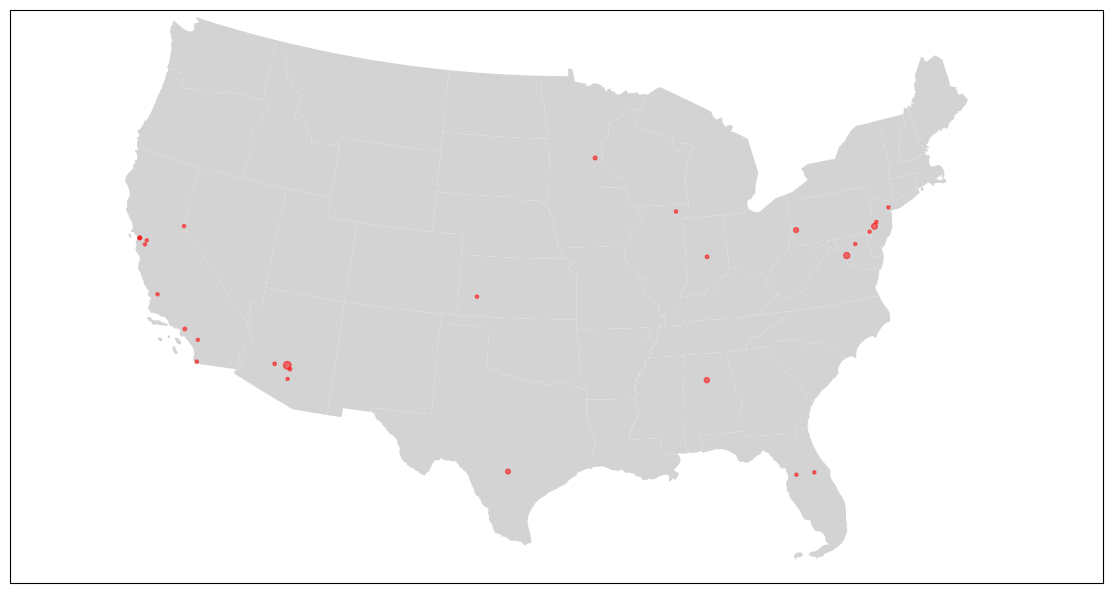

In [87]:
import matplotlib.pyplot as plt
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cartopy.crs as ccrs

# Load your GeoDataFrame (gdf) and USA shapefile
# (Assuming gdf contains the 'Amount' column)
# ...

# Create a Cartopy projection centered on the USA
proj = ccrs.LambertConformal(central_longitude=-95, central_latitude=37.5)

# Create a GeoDataFrame with the USA shapefile, reprojecting it to the chosen projection
usa = usa.to_crs(proj.proj4_init)

# Increase the figure size
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw={'projection': proj})  # Adjust the size as needed

# Set plot limits
ax.set_extent([-125, -66.5, 24, 49], crs=ccrs.PlateCarree())  # Adjust the limits as needed

# Plot the USA map
usa.plot(ax=ax, color='lightgray')

# Calculate marker size based on the 'Amount' column
min_size = 5
max_size = 30
scaled_sizes = (gdf['TicketCount'] - gdf['TicketCount'].min()) / (gdf['TicketCount'].max() - gdf['TicketCount'].min()) * (max_size - min_size) + min_size

# Plot city locations with variable marker size
gdf.plot(ax=ax, color='red', markersize=scaled_sizes, alpha=0.5, transform=ccrs.PlateCarree())

# Add legend
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
sc = ax.scatter([], [], c='red', s=scaled_sizes, alpha=0.5, transform=ccrs.PlateCarree())
plt.colorbar(sc, cax=cax, label='Zip_Code')

# Show the plot
plt.show()


KeyError: 'projection'

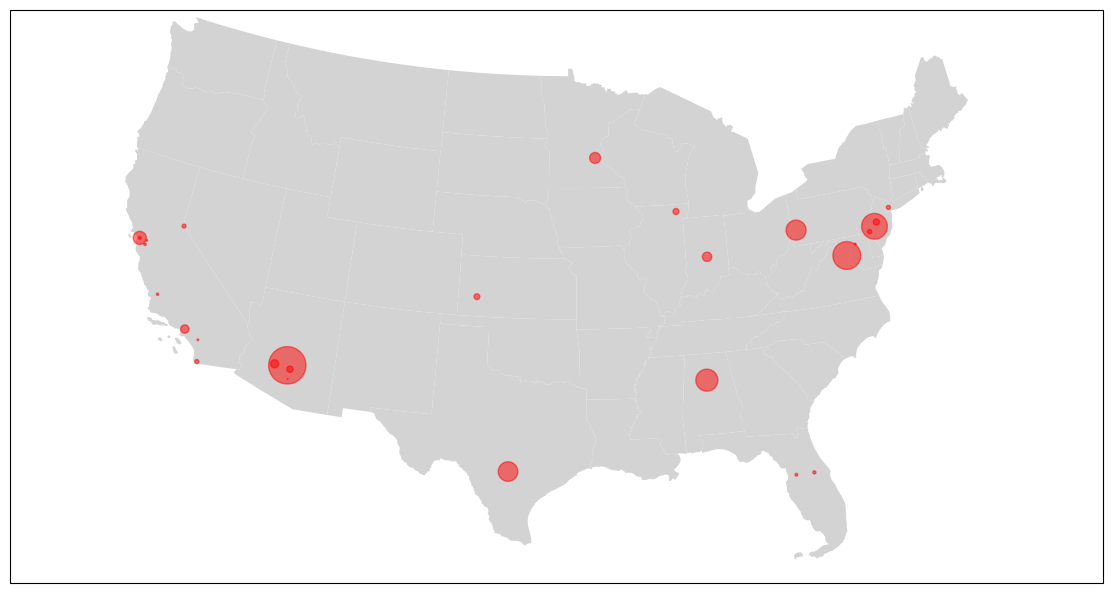

In [89]:
import matplotlib.pyplot as plt
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cartopy.crs as ccrs

# Load your GeoDataFrame (gdf) and USA shapefile
# (Assuming gdf contains the 'Amount' column)
# ...

# Create a Cartopy projection centered on the USA
proj = ccrs.LambertConformal(central_longitude=-95, central_latitude=37.5)

# Create a GeoDataFrame with the USA shapefile, reprojecting it to the chosen projection
usa = usa.to_crs(proj.proj4_init)

# Increase the figure size
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw={'projection': proj})  # Adjust the size as needed

# Set plot limits
ax.set_extent([-125, -66.5, 24, 49], crs=ccrs.PlateCarree())  # Adjust the limits as needed

# Plot the USA map
usa.plot(ax=ax, color='lightgray')

# Calculate marker size based on the 'Amount' column
scaled_sizes = gdf['TicketCount'] * 0.5  # Adjust the scaling factor as needed

# Plot city locations with variable marker size
gdf.plot(ax=ax, color='red', markersize=scaled_sizes, alpha=0.5, transform=ccrs.PlateCarree())

# Add legend
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
sc = ax.scatter([], [], c='red', s=scaled_sizes.max(), alpha=0.5, transform=ccrs.PlateCarree())
plt.colorbar(sc, cax=cax, label='Amount')

# Show the plot
plt.show()


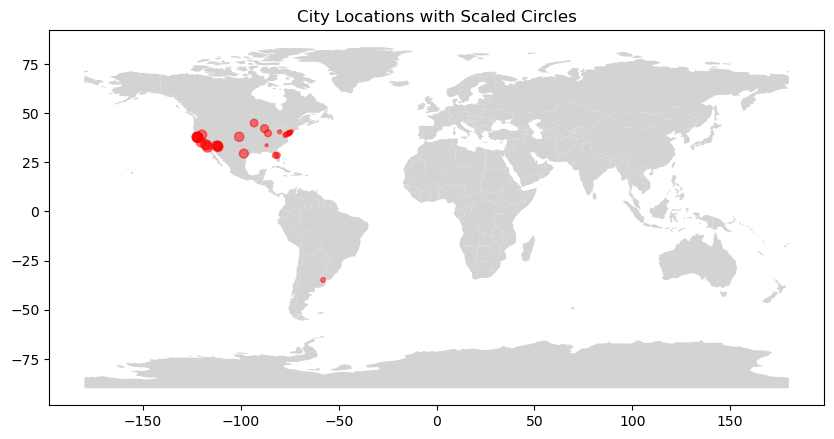

In [91]:
# Assuming you have a maximum value for Amount that determines the circle size
max_amount = gdf['TicketCount'].max()

# Scale the Amount values
scaling_factor = 50  # Adjust this value based on your preference
gdf['Scaled_Amount'] = gdf['TicketCount'] / max_amount * scaling_factor

# Create a GeoDataFrame with the scaled Amount values
geometry = [Point(lon, lat) for lon, lat in zip(gdf['Longitude'], gdf['Latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Optional: Set the coordinate reference system (CRS)
gdf.crs = 'EPSG:4326'  # WGS84 coordinate system

# Plot the cities on a map with scaled circles
fig, ax = plt.subplots(figsize=(10, 6))
world.plot(ax=ax, color='lightgray')

# Plot the cities on top with scaled circles
gdf.plot(ax=ax, color='red', marker='o', markersize=gdf['Scaled_Amount'], alpha=0.5)

plt.title('City Locations with Scaled Circles')
plt.show()